# `SMART FLOOD ALERT SYSTEM`

# OBJECTIVE :
Design and implement a Smart Flood Alert System that combines weather data analysis, flood prediction models, and SMS-based alert mechanisms to provide early flood warnings in vulnerable regions‚Äîparticularly rural or low-connectivity areas.

# PROBLEM STATEMENT :
Flooding poses a significant threat to communities, leading to loss of life, property damage, and disruption of daily activities. Effective and timely flood prediction and alert systems are crucial for mitigating these impacts. However, developing and demonstrating such systems often requires access to complex real-time data streams, sophisticated hydrological models, and integration with external communication services, which can be challenging in a developmental or conceptual phase.
- The current challenge addressed by this Jupyter Notebook code is to conceptually demonstrate the core components of a smart flood alert system using simulated data and simplified models. Specifically, there is a need to:
- Simulate relevant environmental data (rainfall, water level) and historical flood events to create a dataset for analysis and model training.
- Implement and evaluate basic flood prediction logic, including both rules-based heuristics and a machine learning approach (Random Forest Classifier), to identify potential flood risks.
- Illustrate a simulated alert mechanism to demonstrate how warnings could be disseminated to affected populations.
- Provide fundamental data analysis and visualization capabilities to understand historical trends and current conditions.

# KEY GOALS INCLUDES :
- Flood Prediction
- SMS Alert System
- Risk Awareness and Damage Reduction
- Accessible and Scalable

# REQUIREMENTS :
- **pandas:** Used for data manipulation and analysis, primarily for creating and working with DataFrames (e.g., pd.DataFrame).
- **numpy:** Used for numerical operations, particularly within data generation and potentially for array manipulation.
- **datetime:** Python's built-in module for working with dates and times (e.g., datetime.now(), timedelta)
- **random:** Python's built-in module for generating random numbers, used for simulating data.
- **folium:** A Python library used for creating interactive maps and visualizing geographic data.
- **sklearn(Scikit-learn):** The primary machine learning library, specifically:
- **sklearn.model_selection.train_test_split:** For splitting data into training and testing sets.
- **sklearn.ensemble.RandomForestClassifier:** The implementation of the Random Forest algorithm.
- **sklearn.metrics:** For evaluating model performance, including accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, and classification_report.
- **matplotlib.pyplot:** A plotting library used for creating static, interactive, and animated visualizations (e.g., histograms, scatter plots, box plots).
- **seaborn:** A data visualization library based on matplotlib, providing a high-level interface for drawing attractive and informative statistical graphics (e.g., histplot, countplot, scatterplot, boxplot, heatmap).

**Note:** This is a conceptual demonstration. For a real-world system, you would
integrate with actual weather APIs, more sophisticated hydrological models,
and SMS gateway services.

In [1]:
pip install streamlit


Note: you may need to restart the kernel to use updated packages.


In [5]:

import streamlit as st

st.title("Hello, Streamlit!")
st.write("This is a simple Streamlit app.")
x = st.slider("Select a number", 0, 100)
st.write(f"You selected: {x}")


2025-07-07 11:48:44.130 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-07 11:48:44.131 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-07 11:48:44.132 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-07 11:48:44.134 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-07 11:48:44.136 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-07 11:48:44.137 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-07 11:48:44.138 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-07 11:48:44.139 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

## IMPORTING REQUIRED LIBRARIES 

In [6]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import random
import folium 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ( accuracy_score, precision_score,recall_score,f1_score,roc_auc_score, confusion_matrix,classification_report)
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

st.title("Hello, Streamlit!")
st.write("This is your first Streamlit app.")

print("IMPORTEDüëçüëç")

2025-07-07 11:48:58.907 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-07 11:48:58.908 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-07 11:48:58.909 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-07 11:48:58.912 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


IMPORTEDüëçüëç


In [7]:
!streamlit run app.py


Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: app.py


## DATA SIMULATION(Current Weather Data)

In [3]:
def generate_weather_data(num_entries=10):
    """Generates synthetic current weather data."""
    data = []
    locations = [
        'Haripur', 'Shantipur', 'Ramnagar', 'Krishnapur', 'Faizabad', 'Varanasi',
        'Cuttack', 'Guwahati', 'Patna', 'Surat', 'Kochi', 'Hyderabad',
        'Chennai', 'Pune', 'Bhopal', 'Jaipur'
    ]
    for i in range(num_entries):
        timestamp = datetime.now() - timedelta(minutes=i*30)
        rainfall_amount = round(random.uniform(5, 60), 2) 
        water_level = round(random.uniform(5, 12), 2)       
        temperature = round(random.uniform(20, 35), 1)    
        humidity = round(random.uniform(60, 95), 1)         
        location = random.choice(locations)
        data.append({
            'timestamp': timestamp,
            'location': location,
            'rainfall_amount_mm': rainfall_amount,
            'water_level_m': water_level,
            'temperature_c': temperature,
            'humidity_percent': humidity
        })
    return pd.DataFrame(data)

current_weather_df = generate_weather_data(num_entries=20)
print("\nSimulated Current Weather Data‚òî‚òÇüåÇ:")
print(current_weather_df.head())


Simulated Current Weather Data‚òî‚òÇüåÇ:
                   timestamp    location  rainfall_amount_mm  water_level_m  \
0 2025-07-07 09:44:16.752116     Chennai               43.82          11.08   
1 2025-07-07 09:14:16.752152    Ramnagar               28.12          10.77   
2 2025-07-07 08:44:16.752178    Ramnagar               41.00          10.59   
3 2025-07-07 08:14:16.752189        Pune               33.45           7.18   
4 2025-07-07 07:44:16.752196  Krishnapur               17.14           9.99   

   temperature_c  humidity_percent  
0           21.5              85.5  
1           29.8              81.0  
2           22.2              72.1  
3           22.7              89.7  
4           32.2              67.7  


## SIMULATING HISTORICAL FLOOD RECORD ( Data from past 5 years)

In [4]:
def generate_historical_flood_data(num_entries=15):
    """Generates synthetic historical flood records."""
    data = []
    locations = [
        'Haripur', 'Shantipur', 'Ramnagar', 'Krishnapur', 'Faizabad', 'Varanasi',
        'Cuttack', 'Guwahati', 'Patna', 'Surat', 'Kochi', 'Hyderabad',
        'Chennai', 'Pune', 'Bhopal', 'Jaipur'
    ]
    severities = ['Low', 'Medium', 'High']
    for i in range(num_entries):
        timestamp = datetime.now() - timedelta(days=random.randint(30, 365*5)) 
        rainfall_amount = round(random.uniform(40, 150), 2)
        water_level = round(random.uniform(9, 15), 2)
        location = random.choice(locations)
        severity = random.choice(severities)
        deaths = 0
        if severity == 'High':
            deaths = random.randint(1, 10)
        elif severity == 'Medium':
            deaths = random.randint(0, 3)
        
        data.append({
            'timestamp': timestamp,
            'location': location,
            'rainfall_amount_mm': rainfall_amount,
            'water_level_m': water_level,
            'severity': severity,
            'deaths': deaths
        })
    return pd.DataFrame(data)

historical_floods_df = generate_historical_flood_data(num_entries=30)
print("\nSimulated Historical Flood Recordsüìôüìë:")
print(historical_floods_df.head())


Simulated Historical Flood Recordsüìôüìë:
                   timestamp    location  rainfall_amount_mm  water_level_m  \
0 2025-01-07 09:44:16.860995  Krishnapur               93.29           9.79   
1 2020-08-03 09:44:16.861031    Faizabad              142.13          14.31   
2 2020-12-20 09:44:16.861045       Kochi               63.38           9.66   
3 2020-07-19 09:44:16.861053       Kochi               59.83          11.71   
4 2025-05-12 09:44:16.861060    Ramnagar               88.67          10.86   

  severity  deaths  
0     High       6  
1   Medium       0  
2   Medium       0  
3      Low       0  
4     High       8  


## DATA ANALYSIS

In [5]:
if not historical_floods_df.empty:
    avg_rainfall_flood = historical_floods_df['rainfall_amount_mm'].mean()
    avg_water_level_flood = historical_floods_df['water_level_m'].mean()
    print(f"\nAverage Rainfall during Historical Floods: {avg_rainfall_flood:.2f} mm")
    print(f"Average Water Level during Historical Floods: {avg_water_level_flood:.2f} m")

if not historical_floods_df.empty:
    severity_counts = historical_floods_df['severity'].value_counts()
    print("\nHistorical Flood Severity Counts:")
    print(severity_counts)
    
if 'deaths' in historical_floods_df.columns and not historical_floods_df.empty:
    total_deaths = historical_floods_df['deaths'].sum()
    print(f"\nTotal Recorded Deaths from Historical Floods: {total_deaths}")


Average Rainfall during Historical Floods: 92.91 mm
Average Water Level during Historical Floods: 11.87 m

Historical Flood Severity Counts:
severity
Medium    12
High       9
Low        9
Name: count, dtype: int64

Total Recorded Deaths from Historical Floods: 55


## DATA VISULIZATION 

In [6]:
if not historical_floods_df.empty:
    print("\nDescriptive Statistics for Historical Flood Data:")
    print(historical_floods_df[['rainfall_amount_mm', 'water_level_m', 'deaths']].describe())


Descriptive Statistics for Historical Flood Data:
       rainfall_amount_mm  water_level_m     deaths
count           30.000000      30.000000  30.000000
mean            92.910667      11.873000   1.833333
std             27.731148       1.725649   2.614065
min             46.150000       9.180000   0.000000
25%             74.360000      10.300000   0.000000
50%             89.070000      11.870000   0.000000
75%            116.142500      13.222500   3.000000
max            142.130000      14.730000   9.000000


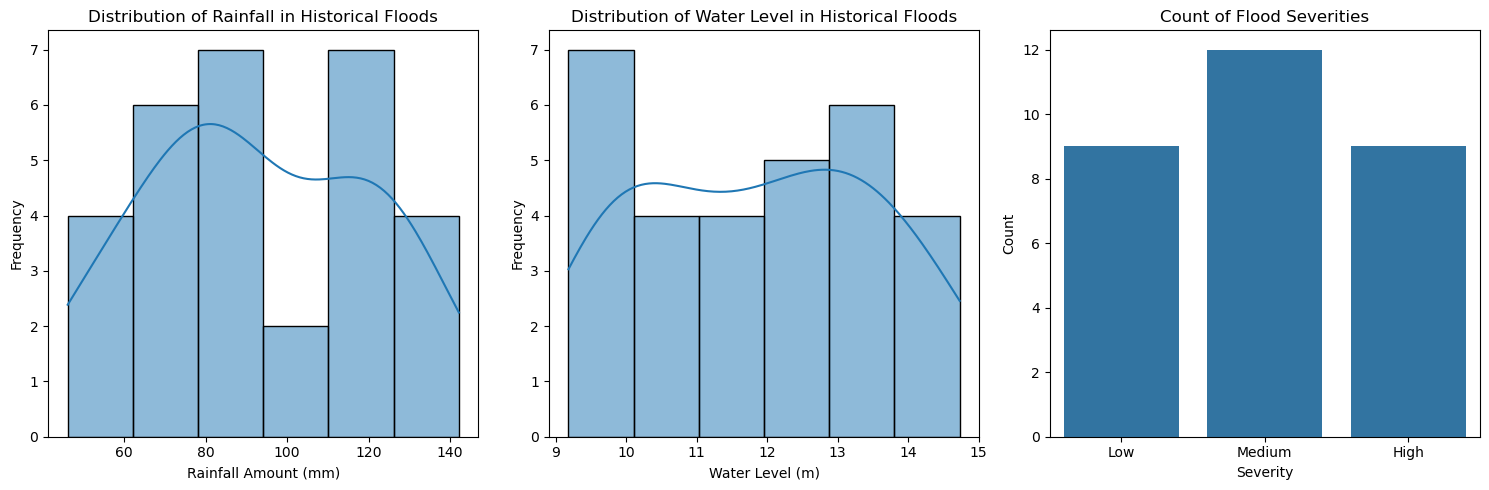

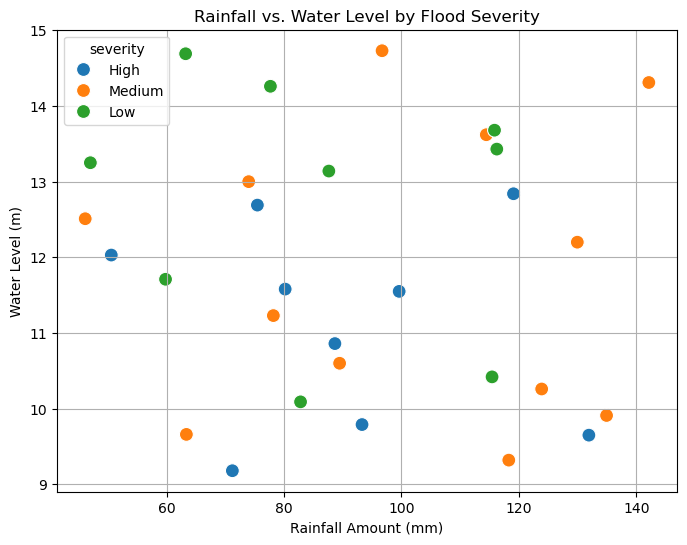

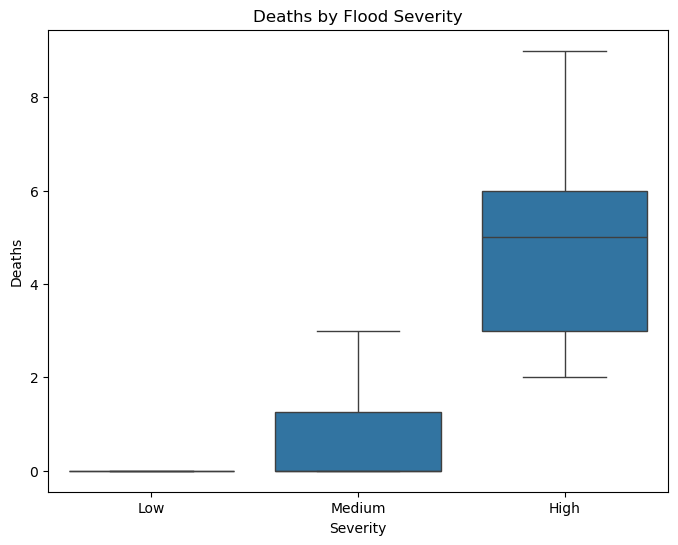

In [7]:
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    sns.histplot(historical_floods_df['rainfall_amount_mm'], kde=True)
    plt.title('Distribution of Rainfall in Historical Floods')
    plt.xlabel('Rainfall Amount (mm)')
    plt.ylabel('Frequency')

    plt.subplot(1, 3, 2)
    sns.histplot(historical_floods_df['water_level_m'], kde=True)
    plt.title('Distribution of Water Level in Historical Floods')
    plt.xlabel('Water Level (m)')
    plt.ylabel('Frequency')

    plt.subplot(1, 3, 3)
    sns.countplot(x='severity', data=historical_floods_df, order=['Low', 'Medium', 'High'])
    plt.title('Count of Flood Severities')
    plt.xlabel('Severity')
    plt.ylabel('Count')

    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='rainfall_amount_mm', y='water_level_m', hue='severity', data=historical_floods_df, s=100)
    plt.title('Rainfall vs. Water Level by Flood Severity')
    plt.xlabel('Rainfall Amount (mm)')
    plt.ylabel('Water Level (m)')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(8, 6))
    sns.boxplot(x='severity', y='deaths', data=historical_floods_df, order=['Low', 'Medium', 'High'])
    plt.title('Deaths by Flood Severity')
    plt.xlabel('Severity')
    plt.ylabel('Deaths')
    plt.show()


##  MACHINE LEARNING MODLE((Random Forest for Flood Prediction))

### X&Y ARRAY CREATON 

In [8]:
if not historical_floods_df.empty:
    historical_floods_df['is_flood'] = historical_floods_df['severity'].apply(
        lambda x: 1 if x in ['Medium', 'High'] else 0
    )

    X = historical_floods_df[['rainfall_amount_mm', 'water_level_m']]
    y = historical_floods_df['is_flood']

### TRAIN-TEST SPLIT 

In [9]:
if len(X) > 1: 
        if y.nunique() > 1 and y.value_counts().min() > 1:
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
        else:
            print("Warning: Not enough unique classes or samples per class for stratified split. Performing non-stratified split.")
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### RANDOM FOREST 

In [10]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### MAKE PREDICTION 

In [11]:
y_pred = rf_model.predict(X_test)
y_proba = rf_model.predict_proba(X_test)[:, 1]

### CHECKING PREDICTION SCORE 

In [12]:
print("\nRandom Forest Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"Precision: {precision_score(y_test, y_pred):.2f}")
print(f"Recall: {recall_score(y_test, y_pred):.2f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.2f}")


Random Forest Model Performance:
Accuracy: 0.67
Precision: 0.67
Recall: 1.00
F1-Score: 0.80


### CHECKING ROC & AUC SCORE 

In [13]:
if len(np.unique(y_test)) > 1:
    try:
        print(f"ROC AUC Score: {roc_auc_score(y_test, y_proba):.2f}")
    except ValueError as e:
        print(f"ROC AUC Score could not be computed: {e}")
    else:
        print("ROC AUC Score not applicable (only one class present in y_test).")

ROC AUC Score: 0.50
ROC AUC Score not applicable (only one class present in y_test).


### CONFUSION MATRIX 

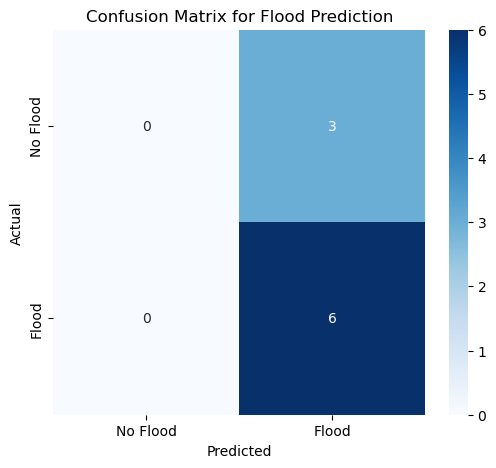


Classification Report:
              precision    recall  f1-score   support

    No Flood       0.00      0.00      0.00         3
       Flood       0.67      1.00      0.80         6

    accuracy                           0.67         9
   macro avg       0.33      0.50      0.40         9
weighted avg       0.44      0.67      0.53         9



C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [14]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Flood', 'Flood'],
            yticklabels=['No Flood', 'Flood'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Flood Prediction')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['No Flood', 'Flood']))

### FEATURE IMPORTENCE 

In [15]:
if X.shape[0] >= 2: 
    feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
    print("\nFeature Importances:")
    print(feature_importances.sort_values(ascending=False))
elif X.shape[0] >= 1: 
    print("Not enough historical flood data to train a meaningful ML model (less than 2 samples).")
else:
    print("No historical flood data available for training a machine learning model.")


Feature Importances:
rainfall_amount_mm    0.512153
water_level_m         0.487847
dtype: float64


## FLOOD PREDICITION LOGIC 

In [16]:
def predict_flood(rainfall, water_level):
    """
    Predicts flood risk based on simplified rules.
    Args:
        rainfall (float): Current rainfall amount in mm.
        water_level (float): Current water level in meters.
    Returns:
        tuple: (prediction_text, alert_type, local_language_message)
    """
    prediction_text = 'No immediate flood threat.'
    alert_type = 'No Alert'
    alert_message_local = '‡§ï‡•ã‡§à ‡§§‡§§‡•ç‡§ï‡§æ‡§≤ ‡§¨‡§æ‡§¢‡§º ‡§ï‡§æ ‡§ñ‡§§‡§∞‡§æ ‡§®‡§π‡•Ä‡§Ç‡•§' # Hindi: No immediate flood threat

    if rainfall > 50 and water_level > 10:
        prediction_text = 'HIGH RISK OF FLOOD! Heavy rainfall and high water levels detected.'
        alert_type = 'Flood Warning'
        alert_message_local = '‡§¨‡§æ‡§¢‡§º ‡§ï‡§æ ‡§â‡§ö‡•ç‡§ö ‡§ú‡•ã‡§ñ‡§ø‡§Æ! ‡§≠‡§æ‡§∞‡•Ä ‡§µ‡§∞‡•ç‡§∑‡§æ ‡§î‡§∞ ‡§â‡§ö‡•ç‡§ö ‡§ú‡§≤ ‡§∏‡•ç‡§§‡§∞ ‡§ï‡§æ ‡§™‡§§‡§æ ‡§ö‡§≤‡§æ ‡§π‡•à‡•§ ‡§ï‡•É‡§™‡§Ø‡§æ ‡§∏‡•Å‡§∞‡§ï‡•ç‡§∑‡§ø‡§§ ‡§∏‡•ç‡§•‡§æ‡§® ‡§™‡§∞ ‡§ú‡§æ‡§è‡§Ç‡•§ (High risk of flood! Heavy rain and high water levels detected. Please move to a safe place.)'
    elif rainfall > 30 and water_level > 8:
        prediction_text = 'MODERATE RISK OF FLOOD. Increased rainfall and water levels.'
        alert_type = 'Flood Advisory'
        alert_message_local = '‡§¨‡§æ‡§¢‡§º ‡§ï‡§æ ‡§Æ‡§ß‡•ç‡§Ø‡§Æ ‡§ú‡•ã‡§ñ‡§ø‡§Æ‡•§ ‡§µ‡§∞‡•ç‡§∑‡§æ ‡§î‡§∞ ‡§ú‡§≤ ‡§∏‡•ç‡§§‡§∞ ‡§Æ‡•á‡§Ç ‡§µ‡•É‡§¶‡•ç‡§ß‡§ø‡•§ ‡§∏‡§§‡§∞‡•ç‡§ï ‡§∞‡§π‡•á‡§Ç‡•§ (Moderate risk of flood. Increased rain and water levels. Be alert.)'
    elif rainfall > 20:
        prediction_text = 'Potential for increased water levels due to rainfall. Monitor closely.'
        alert_type = 'Monitoring'
        alert_message_local = '‡§µ‡§∞‡•ç‡§∑‡§æ ‡§ï‡•á ‡§ï‡§æ‡§∞‡§£ ‡§ú‡§≤ ‡§∏‡•ç‡§§‡§∞ ‡§¨‡§¢‡§º‡§®‡•á ‡§ï‡•Ä ‡§∏‡§Ç‡§≠‡§æ‡§µ‡§®‡§æ‡•§ ‡§¨‡§æ‡§∞‡•Ä‡§ï‡•Ä ‡§∏‡•á ‡§®‡§ø‡§ó‡§∞‡§æ‡§®‡•Ä ‡§ï‡§∞‡•á‡§Ç‡•§ (Potential for increased water levels due to rain. Monitor closely.)'

    return prediction_text, alert_type, alert_message_local

### TEST THE PREDICTION LOGIC(some example values)

In [17]:
test_rainfall_1 = 45
test_water_level_1 = 9.5
pred_text_1, alert_type_1, msg_1 = predict_flood(test_rainfall_1, test_water_level_1)
print(f"\nTest 1: Rainfall={test_rainfall_1}mm, Water Level={test_water_level_1}m")
print(f"  Prediction: {pred_text_1}")
print(f"  Alert Type: {alert_type_1}")
print(f"  Local Message: {msg_1}")

test_rainfall_2 = 60
test_water_level_2 = 11.0
pred_text_2, alert_type_2, msg_2 = predict_flood(test_rainfall_2, test_water_level_2)
print(f"\nTest 2: Rainfall={test_rainfall_2}mm, Water Level={test_water_level_2}m")
print(f"  Prediction: {pred_text_2}")
print(f"  Alert Type: {alert_type_2}")
print(f"  Local Message: {msg_2}")

test_rainfall_3 = 15
test_water_level_3 = 7.0
pred_text_3, alert_type_3, msg_3 = predict_flood(test_rainfall_3, test_water_level_3)
print(f"\nTest 3: Rainfall={test_rainfall_3}mm, Water Level={test_water_level_3}m")
print(f"  Prediction: {pred_text_3}")
print(f"  Alert Type: {alert_type_3}")
print(f"  Local Message: {msg_3}")


Test 1: Rainfall=45mm, Water Level=9.5m
  Prediction: MODERATE RISK OF FLOOD. Increased rainfall and water levels.
  Alert Type: Flood Advisory
  Local Message: ‡§¨‡§æ‡§¢‡§º ‡§ï‡§æ ‡§Æ‡§ß‡•ç‡§Ø‡§Æ ‡§ú‡•ã‡§ñ‡§ø‡§Æ‡•§ ‡§µ‡§∞‡•ç‡§∑‡§æ ‡§î‡§∞ ‡§ú‡§≤ ‡§∏‡•ç‡§§‡§∞ ‡§Æ‡•á‡§Ç ‡§µ‡•É‡§¶‡•ç‡§ß‡§ø‡•§ ‡§∏‡§§‡§∞‡•ç‡§ï ‡§∞‡§π‡•á‡§Ç‡•§ (Moderate risk of flood. Increased rain and water levels. Be alert.)

Test 2: Rainfall=60mm, Water Level=11.0m
  Prediction: HIGH RISK OF FLOOD! Heavy rainfall and high water levels detected.
  Alert Type: Flood Warning
  Local Message: ‡§¨‡§æ‡§¢‡§º ‡§ï‡§æ ‡§â‡§ö‡•ç‡§ö ‡§ú‡•ã‡§ñ‡§ø‡§Æ! ‡§≠‡§æ‡§∞‡•Ä ‡§µ‡§∞‡•ç‡§∑‡§æ ‡§î‡§∞ ‡§â‡§ö‡•ç‡§ö ‡§ú‡§≤ ‡§∏‡•ç‡§§‡§∞ ‡§ï‡§æ ‡§™‡§§‡§æ ‡§ö‡§≤‡§æ ‡§π‡•à‡•§ ‡§ï‡•É‡§™‡§Ø‡§æ ‡§∏‡•Å‡§∞‡§ï‡•ç‡§∑‡§ø‡§§ ‡§∏‡•ç‡§•‡§æ‡§® ‡§™‡§∞ ‡§ú‡§æ‡§è‡§Ç‡•§ (High risk of flood! Heavy rain and high water levels detected. Please move to a safe place.)

Test 3: Rainfall=15mm, Water Level=7.0m
  Prediction: No immediate flood threat.
  Alert Type: No Alert
  Lo

## SIMULATE SMS ALERT AND LOG 

In [18]:
sms_alert_log = []

def send_sms_alert(location, message, alert_type, phone_numbers):
    """
    Simulates sending an SMS alert to specific numbers and logs it.
    Args:
        location (str): The location for which the alert is being sent.
        message (str): The alert message in local language.
        alert_type (str): The type of alert (e.g., 'Flood Warning').
        phone_numbers (list): A list of phone numbers (strings) to send the alert to.
    """
    timestamp = datetime.now()
    for number in phone_numbers:
        log_entry = {
            'timestamp': timestamp,
            'location': location,
            'alert_type': alert_type,
            'message': message,
            'recipient_number': number
        }
        sms_alert_log.append(log_entry)
        print(f"\n--- SIMULATED SMS ALERT ---")
        print(f"To: {number} (Villagers in {location})")
        print(f"Type: {alert_type}")
        print(f"Message ({timestamp.strftime('%Y-%m-%d %H:%M:%S')}): {message}")
        print(f"---------------------------\n")

## ADDING API 

In [25]:
import requests

url = "https://www.fast2sms.com/dev/bulkV2"

payload = {
    "sender_id": "FSTSMS",
    "message": "This is a test message from my Smart Flood Alert system!",
    "language": "english",
    "route": "v3",
    "numbers": "YOUR_PHONE_NUMBER"  
}

headers = {
    "authorization": "YOUR_FAST2SMS_API_KEY",  # Paste your real API key
    "Content-Type": "application/x-www-form-urlencoded"
}

response = requests.post(url, data=payload, headers=headers)
print(response.json())


{'return': False, 'status_code': 412, 'message': 'Invalid Authentication, Check Authorization Key'}


In [37]:
from twilio.rest import Client

# Your credentials
account_sid = 'AC36f597925830a094f0f98395a039b3dd'
auth_token = '5b6e21f1bf1b983bfa72f099e7d90013'  # üîê Replace with the new one from Twilio
verify_sid =  'VA9c9f7f0b59e7412c8ea06b4a9f7b65ef' # Replace with correct SID

client = Client(account_sid, auth_token)

# User‚Äôs phone number
phone_number = '+919741180015'

try:
    verification = client.verify.v2.services(verify_sid).verifications.create(
        to=phone_number,
        channel='sms'
    )
    print("‚úÖ OTP sent. Status:", verification.status)
except Exception as e:
    print("‚ùå Error occurred:", e)


‚ùå Error occurred: HTTP 404 error: Unable to create record: The requested resource /v2/Services/VA9c9f7f0b59e7412c8ea06b4a9f7b65ef/Verifications was not found


## PROCESS THE LATEST WEATHER DATA ENTRY FOR PREDICTON AND ALERT       

In [20]:
if not current_weather_df.empty:
    latest_weather = current_weather_df.iloc[0] # Get the most recent entry
    print(f"\nProcessing latest weather data for {latest_weather['location']}:")
    print(f"  Rainfall: {latest_weather['rainfall_amount_mm']}mm, Water Level: {latest_weather['water_level_m']}m")
    prediction_text, alert_type, alert_message_local = predict_flood(
        latest_weather['rainfall_amount_mm'],
        latest_weather['water_level_m']
    )
    print(f"  Prediction: {prediction_text}")
    dummy_phone_numbers = ['+919453760084', '+919279039463', '+916200170615']

    if alert_type in ['Flood Warning', 'Flood Advisory', 'Monitoring', 'All Clear']:
        send_sms_alert(latest_weather['location'], alert_message_local, alert_type, dummy_phone_numbers)
    else:
        print("No alert triggered for current conditions.")
else:
    print("No current weather data to process for prediction.")


Processing latest weather data for Chennai:
  Rainfall: 43.82mm, Water Level: 11.08m
  Prediction: MODERATE RISK OF FLOOD. Increased rainfall and water levels.

--- SIMULATED SMS ALERT ---
To: +919453760084 (Villagers in Chennai)
Type: Flood Advisory
Message (2025-07-07 09:45:04): ‡§¨‡§æ‡§¢‡§º ‡§ï‡§æ ‡§Æ‡§ß‡•ç‡§Ø‡§Æ ‡§ú‡•ã‡§ñ‡§ø‡§Æ‡•§ ‡§µ‡§∞‡•ç‡§∑‡§æ ‡§î‡§∞ ‡§ú‡§≤ ‡§∏‡•ç‡§§‡§∞ ‡§Æ‡•á‡§Ç ‡§µ‡•É‡§¶‡•ç‡§ß‡§ø‡•§ ‡§∏‡§§‡§∞‡•ç‡§ï ‡§∞‡§π‡•á‡§Ç‡•§ (Moderate risk of flood. Increased rain and water levels. Be alert.)
---------------------------


--- SIMULATED SMS ALERT ---
To: +919279039463 (Villagers in Chennai)
Type: Flood Advisory
Message (2025-07-07 09:45:04): ‡§¨‡§æ‡§¢‡§º ‡§ï‡§æ ‡§Æ‡§ß‡•ç‡§Ø‡§Æ ‡§ú‡•ã‡§ñ‡§ø‡§Æ‡•§ ‡§µ‡§∞‡•ç‡§∑‡§æ ‡§î‡§∞ ‡§ú‡§≤ ‡§∏‡•ç‡§§‡§∞ ‡§Æ‡•á‡§Ç ‡§µ‡•É‡§¶‡•ç‡§ß‡§ø‡•§ ‡§∏‡§§‡§∞‡•ç‡§ï ‡§∞‡§π‡•á‡§Ç‡•§ (Moderate risk of flood. Increased rain and water levels. Be alert.)
---------------------------


--- SIMULATED SMS ALERT ---
To: +916200170615 (Villagers in Chennai)
Type:

## DISPLAYING SIMULATED SMS ALERT 

In [21]:
print("\nSimulated SMS Alert Log:")
if sms_alert_log:
    for entry in sms_alert_log:
        print(f"- [{entry['timestamp'].strftime('%Y-%m-%d %H:%M:%S')}] {entry['location']} ({entry['alert_type']}) to {entry['recipient_number']}: {entry['message']}")
else:
    print("No alerts have been sent yet.")


Simulated SMS Alert Log:
- [2025-07-07 09:45:04] Chennai (Flood Advisory) to +919453760084: ‡§¨‡§æ‡§¢‡§º ‡§ï‡§æ ‡§Æ‡§ß‡•ç‡§Ø‡§Æ ‡§ú‡•ã‡§ñ‡§ø‡§Æ‡•§ ‡§µ‡§∞‡•ç‡§∑‡§æ ‡§î‡§∞ ‡§ú‡§≤ ‡§∏‡•ç‡§§‡§∞ ‡§Æ‡•á‡§Ç ‡§µ‡•É‡§¶‡•ç‡§ß‡§ø‡•§ ‡§∏‡§§‡§∞‡•ç‡§ï ‡§∞‡§π‡•á‡§Ç‡•§ (Moderate risk of flood. Increased rain and water levels. Be alert.)
- [2025-07-07 09:45:04] Chennai (Flood Advisory) to +919279039463: ‡§¨‡§æ‡§¢‡§º ‡§ï‡§æ ‡§Æ‡§ß‡•ç‡§Ø‡§Æ ‡§ú‡•ã‡§ñ‡§ø‡§Æ‡•§ ‡§µ‡§∞‡•ç‡§∑‡§æ ‡§î‡§∞ ‡§ú‡§≤ ‡§∏‡•ç‡§§‡§∞ ‡§Æ‡•á‡§Ç ‡§µ‡•É‡§¶‡•ç‡§ß‡§ø‡•§ ‡§∏‡§§‡§∞‡•ç‡§ï ‡§∞‡§π‡•á‡§Ç‡•§ (Moderate risk of flood. Increased rain and water levels. Be alert.)
- [2025-07-07 09:45:04] Chennai (Flood Advisory) to +916200170615: ‡§¨‡§æ‡§¢‡§º ‡§ï‡§æ ‡§Æ‡§ß‡•ç‡§Ø‡§Æ ‡§ú‡•ã‡§ñ‡§ø‡§Æ‡•§ ‡§µ‡§∞‡•ç‡§∑‡§æ ‡§î‡§∞ ‡§ú‡§≤ ‡§∏‡•ç‡§§‡§∞ ‡§Æ‡•á‡§Ç ‡§µ‡•É‡§¶‡•ç‡§ß‡§ø‡•§ ‡§∏‡§§‡§∞‡•ç‡§ï ‡§∞‡§π‡•á‡§Ç‡•§ (Moderate risk of flood. Increased rain and water levels. Be alert.)


## MAP VISULIZATION 

#### ADDING BORDER RANGE OF CITIES 

In [22]:
village_coords = {
    'Haripur': [25.5941, 85.1376],   
    'Shantipur': [22.5726, 88.3639], 
    'Ramnagar': [26.8467, 80.9462], 
    'Krishnapur': [28.6139, 77.2090], 
    'Faizabad': [26.7766, 82.1963],   
    'Varanasi': [25.3176, 82.9739],    
    'Cuttack': [20.4631, 85.8821],    
    'Guwahati': [26.1445, 91.7362],  
    'Patna': [25.5941, 85.1376],      
    'Surat': [21.1702, 72.8311],       
    'Kochi': [9.9312, 76.2673],       
    'Hyderabad': [17.3850, 78.4867], 
    'Chennai': [13.0827, 80.2707],    
    'Pune': [18.5204, 73.8567],       
    'Bhopal': [23.2599, 77.4126],    
    'Jaipur': [26.9124, 75.7873]      
}

#### ADDING DIVERSE RISK ASSIGNMENTS 

In [23]:
m = folium.Map(location=[22.0, 78.0], zoom_start=5) 
simulated_risk = {
    'Haripur': 'No Alert',
    'Shantipur': 'No Alert',
    'Ramnagar': 'Flood Warning',
    'Krishnapur': 'Monitoring',
    'Faizabad': 'No Alert',
    'Varanasi': 'Flood Advisory',
    'Cuttack': 'Flood Warning', 
    'Guwahati': 'Flood Warning', 
    'Patna': 'Flood Advisory',
    'Surat': 'No Alert',
    'Kochi': 'Monitoring',
    'Hyderabad': 'No Alert',
    'Chennai': 'Flood Advisory',
    'Pune': 'Monitoring',
    'Bhopal': 'No Alert',
    'Jaipur': 'No Alert'
}

#### ADDING MARKS ON RISKY CITY/VILLAGE 

In [24]:
for village, coords in village_coords.items():
    risk_level = simulated_risk.get(village, 'No Alert')
    marker_color = 'blue' # Default color
    icon_type = 'info-sign' # Default icon

    if risk_level == 'Flood Warning':
        marker_color = 'red'
        icon_type = 'exclamation-sign'
    elif risk_level == 'Flood Advisory':
        marker_color = 'orange'
        icon_type = 'warning-sign'
    elif risk_level == 'Monitoring':
        marker_color = 'yellow'
        icon_type = 'eye-open'

    folium.Marker(
        location=coords,
        popup=f"<b>{village}</b><br>Lat: {coords[0]}, Lon: {coords[1]}<br>Risk: {risk_level}",
        tooltip=village,
        icon=folium.Icon(color=marker_color, icon=icon_type)
    ).add_to(m)

print("\nMap of Villages/Cities (with simulated flood risk highlightingüó∫üó∫:")
m


Map of Villages/Cities (with simulated flood risk highlightingüó∫üó∫:


C:\Users\Admin\AppData\Local\Temp\ipykernel_54100\3114939424.py:20: UserWarning: color argument of Icon should be one of: {'darkgreen', 'green', 'pink', 'orange', 'white', 'beige', 'blue', 'darkpurple', 'red', 'darkblue', 'lightgray', 'gray', 'lightblue', 'lightgreen', 'lightred', 'darkred', 'purple', 'cadetblue', 'black'}.
  icon=folium.Icon(color=marker_color, icon=icon_type)
